# 1. Import and Install Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
#mp_pose = mp.solutions.pose.Pose()
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.face_landmarks.landmark)

468

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
draw_landmarks(frame, results)

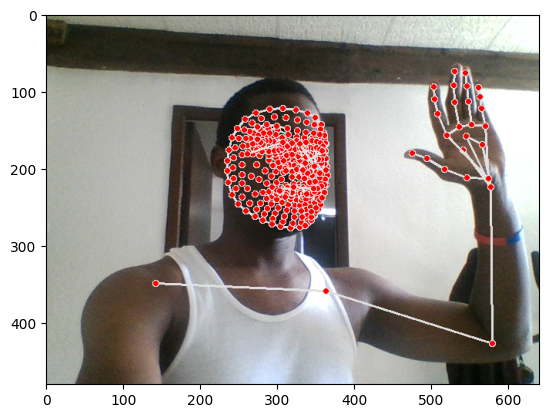

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
else:
    face = np.zeros(1404)


In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
result_test

array([ 0.54463685,  0.41195193, -0.72285944, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
468*3+33*4+21*3+21*3

1662

In [20]:
np.save('0', result_test)

In [21]:
np.load('0.npy')

array([ 0.54463685,  0.41195193, -0.72285944, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [22]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [23]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [24]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [26]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [27]:
label_map = {label:num for num, label in enumerate(actions)}

In [28]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [29]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [30]:
np.array(sequences).shape

(90, 30, 1662)

In [31]:
np.array(labels).shape

(90,)

In [32]:
X = np.array(sequences)

In [33]:
X.shape

(90, 30, 1662)

In [34]:
y = to_categorical(labels).astype(int)

In [35]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [57]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [58]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [59]:
res = [.7, 0.2, 0.1]

In [60]:
actions[np.argmax(res)]

'hello'

In [61]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 8s 823ms/step - loss: 2.9940 - categorical_accuracy: 0.3034
Epoch 2/2000
3/3 [==============================] - 0s 120ms/step - loss: 19.4589 - categorical_accuracy: 0.3600
Epoch 3/2000
3/3 [==============================] - 0s 151ms/step - loss: 39.2238 - categorical_accuracy: 0.2349
Epoch 4/2000
3/3 [==============================] - 0s 126ms/step - loss: 23.2952 - categorical_accuracy: 0.3757
Epoch 5/2000
3/3 [==============================] - 0s 113ms/step - loss: 24.9486 - categorical_accuracy: 0.3249
Epoch 6/2000
3/3 [==============================] - 0s 108ms/step - loss: 22.3183 - categorical_accuracy: 0.2994
Epoch 7/2000
3/3 [==============================] - 0s 105ms/step - loss: 13.9900 - categorical_accuracy: 0.2525
Epoch 8/2000
3/3 [==============================] - 0s 101ms/step - loss: 5.4488 - categorical_accuracy: 0.3385
Epoch 9/2000
3/3 [==============================] - 0s 114ms/step - loss: 7.9487 - categorical_acc

3/3 [==============================] - 0s 102ms/step - loss: 0.4562 - categorical_accuracy: 0.7338
Epoch 146/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4764 - categorical_accuracy: 0.7298
Epoch 147/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4648 - categorical_accuracy: 0.7006
Epoch 148/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4879 - categorical_accuracy: 0.6537
Epoch 149/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4777 - categorical_accuracy: 0.7358
Epoch 150/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4607 - categorical_accuracy: 0.6654
Epoch 151/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4644 - categorical_accuracy: 0.7319
Epoch 152/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6400 - categorical_accuracy: 0.6282
Epoch 153/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4049 - categorical_accuracy: 0.7

3/3 [==============================] - 1s 148ms/step - loss: 0.1304 - categorical_accuracy: 0.9608
Epoch 290/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.0854 - categorical_accuracy: 0.9824
Epoch 291/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0834 - categorical_accuracy: 0.9745
Epoch 292/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0946 - categorical_accuracy: 0.9824
Epoch 293/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.0767 - categorical_accuracy: 0.9804
Epoch 294/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0812 - categorical_accuracy: 0.9843
Epoch 295/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.1276 - categorical_accuracy: 0.9432
Epoch 296/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.1152 - categorical_accuracy: 0.9530
Epoch 297/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.1115 - categorical_accura

3/3 [==============================] - 0s 97ms/step - loss: 7.7709e-04 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 115ms/step - loss: 9.2684e-04 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 111ms/step - loss: 7.5542e-04 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 136ms/step - loss: 8.2202e-04 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 135ms/step - loss: 8.3877e-04 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 119ms/step - loss: 8.4394e-04 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 126ms/step - loss: 6.3491e-04 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 126ms/step - loss: 6.6590e-04 - categorical_accuracy: 1.0000
Epoch 441/2000
3/3 [==============================] - 0s 145ms/step - lo

3/3 [==============================] - 0s 107ms/step - loss: 1.6813e-04 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.9047e-04 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.8234e-04 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.7301e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7822e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.8729e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.8676e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.7138e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 98ms/step - loss: 

3/3 [==============================] - 0s 121ms/step - loss: 14.7763 - categorical_accuracy: 0.3210
Epoch 712/2000
3/3 [==============================] - 0s 120ms/step - loss: 20.3618 - categorical_accuracy: 0.3366
Epoch 713/2000
3/3 [==============================] - 0s 114ms/step - loss: 12.5218 - categorical_accuracy: 0.2858
Epoch 714/2000
3/3 [==============================] - 0s 116ms/step - loss: 14.6139 - categorical_accuracy: 0.3112
Epoch 715/2000
3/3 [==============================] - 0s 128ms/step - loss: 22.9910 - categorical_accuracy: 0.3444
Epoch 716/2000
3/3 [==============================] - 0s 122ms/step - loss: 8.7959 - categorical_accuracy: 0.3131
Epoch 717/2000
3/3 [==============================] - 0s 121ms/step - loss: 9.9766 - categorical_accuracy: 0.3426
Epoch 718/2000
3/3 [==============================] - 0s 126ms/step - loss: 10.9940 - categorical_accuracy: 0.3464
Epoch 719/2000
3/3 [==============================] - 0s 124ms/step - loss: 7.9910 - categorical_

3/3 [==============================] - 0s 95ms/step - loss: 0.9483 - categorical_accuracy: 0.6986
Epoch 784/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1569 - categorical_accuracy: 0.6458
Epoch 785/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.2622 - categorical_accuracy: 0.6516
Epoch 786/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9747 - categorical_accuracy: 0.6536
Epoch 787/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.2661 - categorical_accuracy: 0.6321
Epoch 788/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9203 - categorical_accuracy: 0.6086
Epoch 789/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.8473 - categorical_accuracy: 0.7064
Epoch 790/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9513 - categorical_accuracy: 0.6830
Epoch 791/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.1178 - categorical_accuracy: 0

3/3 [==============================] - 0s 98ms/step - loss: 1.0756 - categorical_accuracy: 0.6653
Epoch 928/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.5505 - categorical_accuracy: 0.7123
Epoch 929/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.5200 - categorical_accuracy: 0.6731
Epoch 930/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.2412 - categorical_accuracy: 0.7670
Epoch 931/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0725 - categorical_accuracy: 0.7162
Epoch 932/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.6116 - categorical_accuracy: 0.7261
Epoch 933/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4636 - categorical_accuracy: 0.7553
Epoch 934/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.5928 - categorical_accuracy: 0.7984
Epoch 935/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5514 - categorical_accuracy:

3/3 [==============================] - 0s 96ms/step - loss: 0.6097 - categorical_accuracy: 0.7475
Epoch 1071/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.4615 - categorical_accuracy: 0.7476
Epoch 1072/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4535 - categorical_accuracy: 0.8081
Epoch 1073/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4785 - categorical_accuracy: 0.8199
Epoch 1074/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4167 - categorical_accuracy: 0.7065
Epoch 1075/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.3849 - categorical_accuracy: 0.7965
Epoch 1076/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4224 - categorical_accuracy: 0.7554
Epoch 1077/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.5789 - categorical_accuracy: 0.8043
Epoch 1078/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5869 - categorical_acc

3/3 [==============================] - 0s 106ms/step - loss: 0.5601 - categorical_accuracy: 0.6987
Epoch 1213/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.5792 - categorical_accuracy: 0.8200
Epoch 1214/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5237 - categorical_accuracy: 0.7281
Epoch 1215/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.4688 - categorical_accuracy: 0.7475
Epoch 1216/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.3399 - categorical_accuracy: 0.9021
Epoch 1217/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5403 - categorical_accuracy: 0.8337
Epoch 1218/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.3157 - categorical_accuracy: 0.8825
Epoch 1219/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.3843 - categorical_accuracy: 0.8395
Epoch 1220/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5190 - categorica

3/3 [==============================] - 0s 116ms/step - loss: 0.5338 - categorical_accuracy: 0.8512
Epoch 1355/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.4753 - categorical_accuracy: 0.7748
Epoch 1356/2000
3/3 [==============================] - 0s 158ms/step - loss: 0.4675 - categorical_accuracy: 0.8943
Epoch 1357/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.3918 - categorical_accuracy: 0.8531
Epoch 1358/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.3966 - categorical_accuracy: 0.8943
Epoch 1359/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.3291 - categorical_accuracy: 0.8179
Epoch 1360/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.3835 - categorical_accuracy: 0.8787
Epoch 1361/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.3600 - categorical_accuracy: 0.8375
Epoch 1362/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.3164 - categorica

3/3 [==============================] - 0s 125ms/step - loss: 0.2525 - categorical_accuracy: 0.9061
Epoch 1497/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.4709 - categorical_accuracy: 0.8611
Epoch 1498/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.2947 - categorical_accuracy: 0.8943
Epoch 1499/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.2500 - categorical_accuracy: 0.8806
Epoch 1500/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.3491 - categorical_accuracy: 0.8572
Epoch 1501/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.5238 - categorical_accuracy: 0.8141
Epoch 1502/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.3540 - categorical_accuracy: 0.9236
Epoch 1503/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.4945 - categorical_accuracy: 0.8845
Epoch 1504/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.3925 - categorica

3/3 [==============================] - 0s 117ms/step - loss: 0.3585 - categorical_accuracy: 0.7398
Epoch 1639/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.3266 - categorical_accuracy: 0.8943
Epoch 1640/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2528 - categorical_accuracy: 0.8983
Epoch 1641/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.2324 - categorical_accuracy: 0.9178
Epoch 1642/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.2304 - categorical_accuracy: 0.9159
Epoch 1643/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.2272 - categorical_accuracy: 0.9139
Epoch 1644/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.2405 - categorical_accuracy: 0.9041
Epoch 1645/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.2584 - categorical_accuracy: 0.8943
Epoch 1646/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.2231 - categorica

3/3 [==============================] - 0s 134ms/step - loss: 0.3303 - categorical_accuracy: 0.8766
Epoch 1781/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.3540 - categorical_accuracy: 0.8962
Epoch 1782/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.4850 - categorical_accuracy: 0.7847
Epoch 1783/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5596 - categorical_accuracy: 0.8473
Epoch 1784/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.1721 - categorical_accuracy: 0.3092
Epoch 1785/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.9855 - categorical_accuracy: 0.7239
Epoch 1786/2000
3/3 [==============================] - 0s 112ms/step - loss: 5.3301 - categorical_accuracy: 0.5166
Epoch 1787/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.9922 - categorical_accuracy: 0.4562
Epoch 1788/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.5729 - categorica

3/3 [==============================] - 0s 116ms/step - loss: 4.0019 - categorical_accuracy: 0.3738
Epoch 1923/2000
3/3 [==============================] - 0s 113ms/step - loss: 3.8058 - categorical_accuracy: 0.3464
Epoch 1924/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.6204 - categorical_accuracy: 0.3581
Epoch 1925/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.7667 - categorical_accuracy: 0.4305
Epoch 1926/2000
3/3 [==============================] - 0s 114ms/step - loss: 3.2690 - categorical_accuracy: 0.3640
Epoch 1927/2000
3/3 [==============================] - 0s 111ms/step - loss: 4.3912 - categorical_accuracy: 0.2623
Epoch 1928/2000
3/3 [==============================] - 0s 132ms/step - loss: 4.0238 - categorical_accuracy: 0.3444
Epoch 1929/2000
3/3 [==============================] - 0s 118ms/step - loss: 3.0005 - categorical_accuracy: 0.3718
Epoch 1930/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.4215 - categorica

In [62]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [63]:
res = model.predict(X_test)

In [64]:
actions[np.argmax(res[4])]

'thanks'

In [65]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [66]:
model.save('action.h5')

In [67]:
#del model

In [68]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

In [71]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[0, 3],
        [0, 2]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [73]:
accuracy_score(ytrue, yhat)

0.4

# 11. Test in Real Time

In [82]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

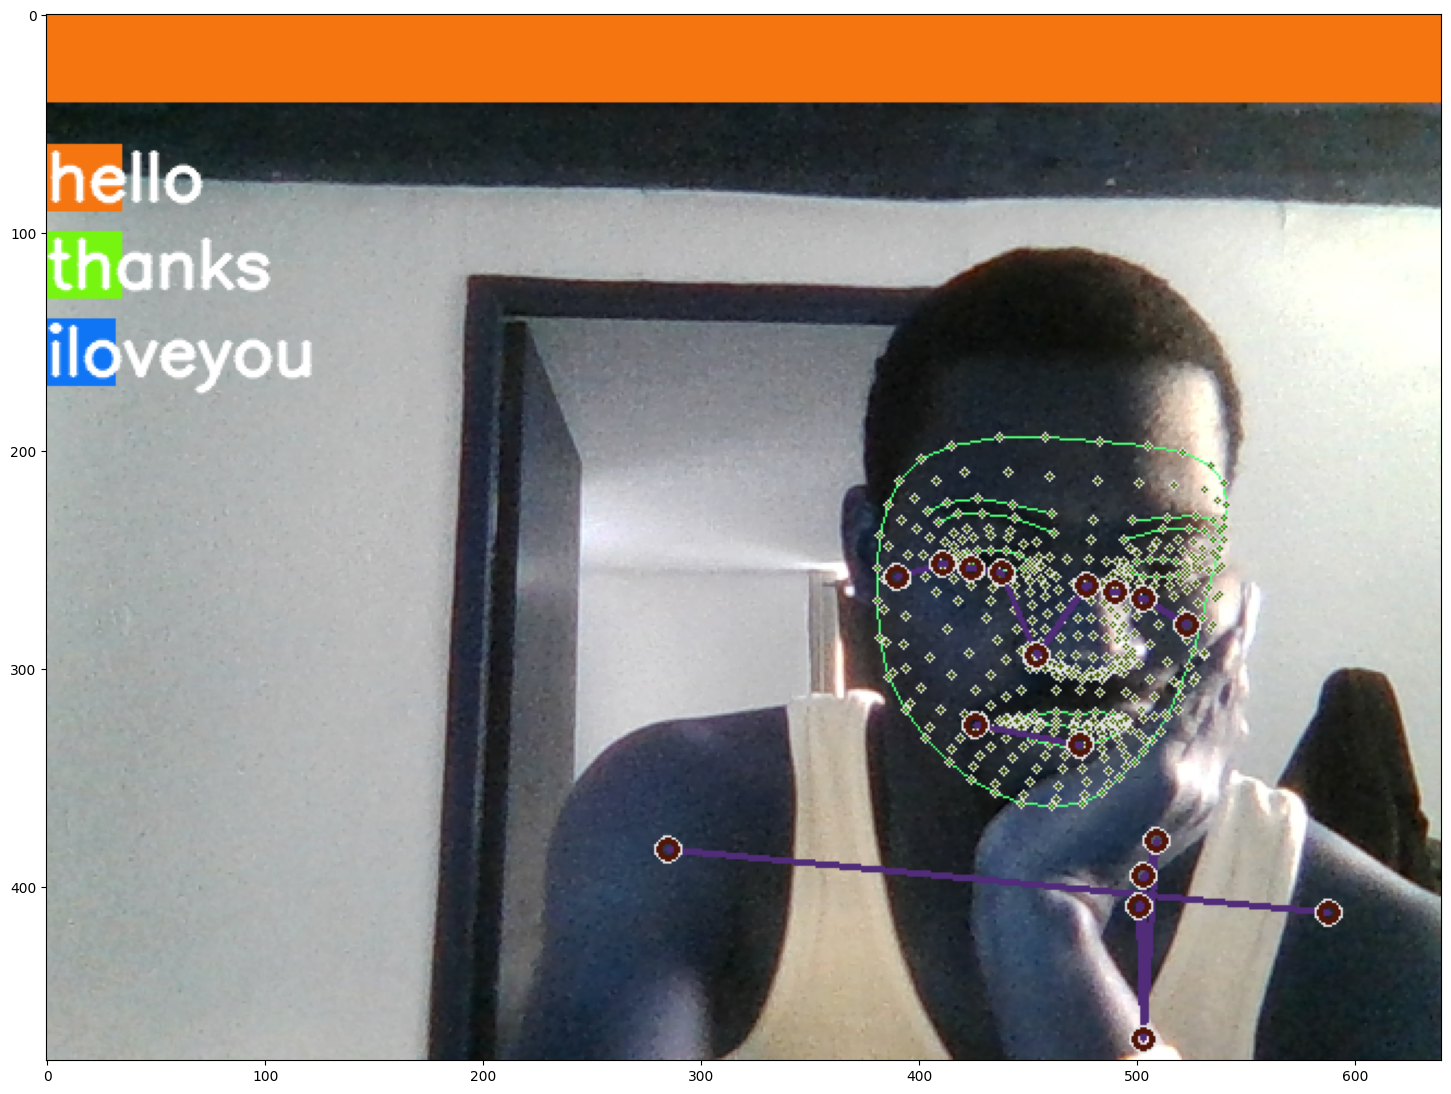

In [83]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [84]:
sequence.reverse()

In [85]:
len(sequence)

30

In [86]:
sequence.append('def')

In [87]:
sequence.reverse()

In [88]:
sequence[-30:]

[array([ 0.64476925,  0.54511362, -0.70978439, ...,  0.52449882,
         0.30538353, -0.02344841]),
 array([ 0.64194405,  0.54707313, -0.70981288, ...,  0.53684717,
         0.46418428, -0.03404509]),
 array([ 0.64383245,  0.53243446, -0.55426729, ...,  0.58311409,
         0.5105288 , -0.08199771]),
 array([ 0.6359576 ,  0.53266793, -0.53304261, ...,  0.60124755,
         0.55424458, -0.07959303]),
 array([ 0.62150508,  0.53038365, -0.57503456, ...,  0.60886484,
         0.60000539, -0.06467331]),
 array([ 0.61598474,  0.52288103, -0.49841624, ...,  0.5999859 ,
         0.60538012, -0.06564932]),
 array([ 0.61093765,  0.51945859, -0.53068125, ...,  0.58989596,
         0.61029464, -0.05987716]),
 array([ 0.6068517 ,  0.51755363, -0.50498283, ...,  0.58821279,
         0.61545682, -0.06265026]),
 array([ 0.60605192,  0.51699507, -0.51679838, ...,  0.59020972,
         0.61521244, -0.06050256]),
 array([ 0.60662985,  0.51642406, -0.57384694, ...,  0.60617465,
         0.60749239, -0.05

In [81]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

In [77]:
cap.release()
cv2.destroyAllWindows()

In [89]:
res[np.argmax(res)] > threshold

False

In [90]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [91]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.33982334, 0.34090656, 0.31927013]], dtype=float32)